In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------------------------- Model ---------------------------------- #
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GaussianNoise
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

import os
os.chdir("../")
from Sources.tools import *

# Data Loading

In [2]:
df = pd.read_csv("Data/fundamental_database_all_companies.csv", sep=";")
df = df.drop(columns=["year"])

In [3]:
df

,asset_turnover,buyback_yield,capex_to_revenue,cash_ratio,cash_to_debt,cogs_to_revenue,current_ratio,days_inventory,debt_to_assets,debt_to_ebitda,...,price_to_earnings_ratio_nri,price_to_free_cashflow,price_to_operating_cashflow,rate_of_return,scaled_net_operating_assets,yoy_ebitda_growth,yoy_eps_growth,yoy_revenue_growth,zscore,close
0,0.66,4.09,0.05,0.74,0.64,0.62,1.28,9.04,0.31,1.51,...,16.73,15.63,12.60,19.24,0.55,9.36,10.83,11.34,3.62,4911.3301
1,0.27,0.01,0.28,0.02,0.01,0.60,0.73,32.18,0.37,4.05,...,21.38,15.63,7.83,3.26,0.66,4.50,1.81,2.68,1.02,4911.3301
2,1.71,6.26,0.01,0.18,0.26,0.75,1.07,36.59,0.20,1.80,...,21.56,14.89,12.12,11.59,0.52,-2.33,-1.05,1.91,4.06,4911.3301
3,0.77,0.83,0.10,2.59,3.44,0.11,3.28,125.66,0.17,5.27,...,144.10,64.82,44.91,22.93,0.19,47.40,326.09,41.27,14.50,4911.3301
4,0.44,5.56,0.04,1.55,1.00,0.17,1.57,125.66,0.82,3.07,...,31.10,21.75,20.22,18.22,-0.54,7.90,7.60,5.83,-5.25,4911.3301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.49,0.33,0.03,0.23,1.39,0.29,1.25,50.20,0.09,0.43,...,32.25,32.75,29.87,9.94,0.30,23.18,26.73,13.36,5.60,16501.7695
503,0.46,5.04,0.01,0.82,0.51,0.27,1.56,50.20,0.58,-3.21,...,32.25,185.51,156.46,9.94,0.32,-51.21,-45.95,18.53,1.27,16501.7695
504,0.89,5.04,0.03,0.91,1.11,0.17,1.19,50.20,0.39,-2.96,...,32.25,58.69,53.73,9.94,0.07,-4.59,13.26,32.25,8.87,16501.7695
505,0.64,-1.81,0.04,3.43,51.26,0.26,3.91,50.20,0.01,0.10,...,34.28,32.32,29.39,9.94,0.09,57.36,100.00,50.75,17.76,16501.7695


In [5]:
X = df.drop(columns=["close"])
y = df["close"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Models

In [9]:
# Initialiser et entraîner le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

y_pred = y_pred_train.tolist() + y_pred_test.tolist()

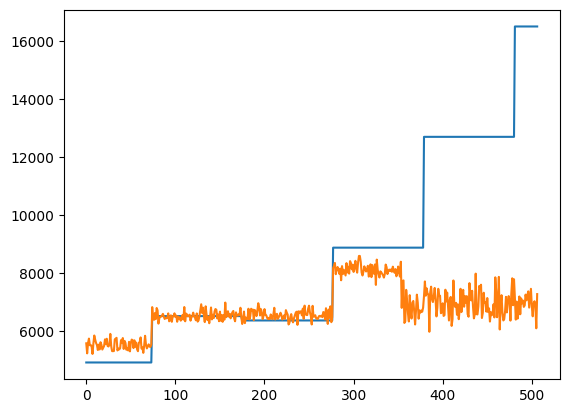

In [11]:
plt.plot(y)
plt.plot(y_pred)
plt.show()

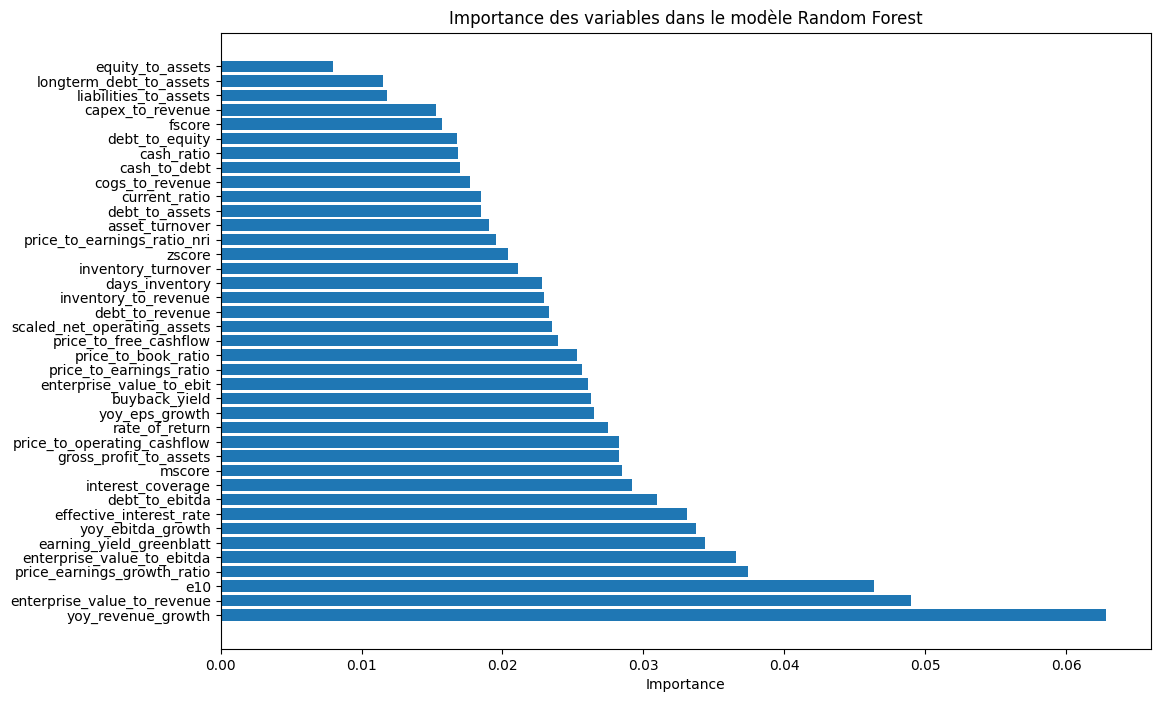

In [14]:
# Obtenir les importances des caractéristiques
importances = rf.feature_importances_

# Créer un DataFrame pour afficher les importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Trier les caractéristiques par ordre d'importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Visualiser les importances des variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Importance')
plt.title('Importance des variables dans le modèle Random Forest')
plt.show()

## OLS

In [12]:
# Créer et ajuster le modèle OLS
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

# Afficher le résumé des résultats
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  close   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              232.4
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                   1.94e-208
Time:                        12:17:38   Log-Likelihood:                         -3024.3
No. Observations:                 354   AIC:                                      6127.
Df Residuals:                     315   BIC:                                      6278.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------